In [1]:
import tensorflow

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img
import os 
import pathlib 
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

In [20]:
import pathlib

In [25]:
path=os.path.join(os.getcwd(),'Rice_Image_Dataset')
#path = pathlib.Path("/Rice_Image_Dataset/")
path = pathlib.Path(path)
print(type(path))

<class 'pathlib.WindowsPath'>


In [26]:
arborio = list(path.glob('Arborio/*'))[:1000]
basmati = list(path.glob('Basmati/*'))[:1000]
ipsala = list(path.glob('Ipsala/*'))[:1000]
jasmine = list(path.glob('Jasmine/*'))[:1000]
karacadag = list(path.glob('Karacadag/*'))[:1000]

In [31]:
print(arborio[0])

C:\Users\91834\Documents\4th year\aws\Rice_Image_Dataset\Arborio\Arborio (1).jpg


In [33]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}
rice_labels= {
    0: "Arborio",
    1: "Basmati",
    2: "Ipsala",
    3:"Jasmine",
    4:"Karacadag"}

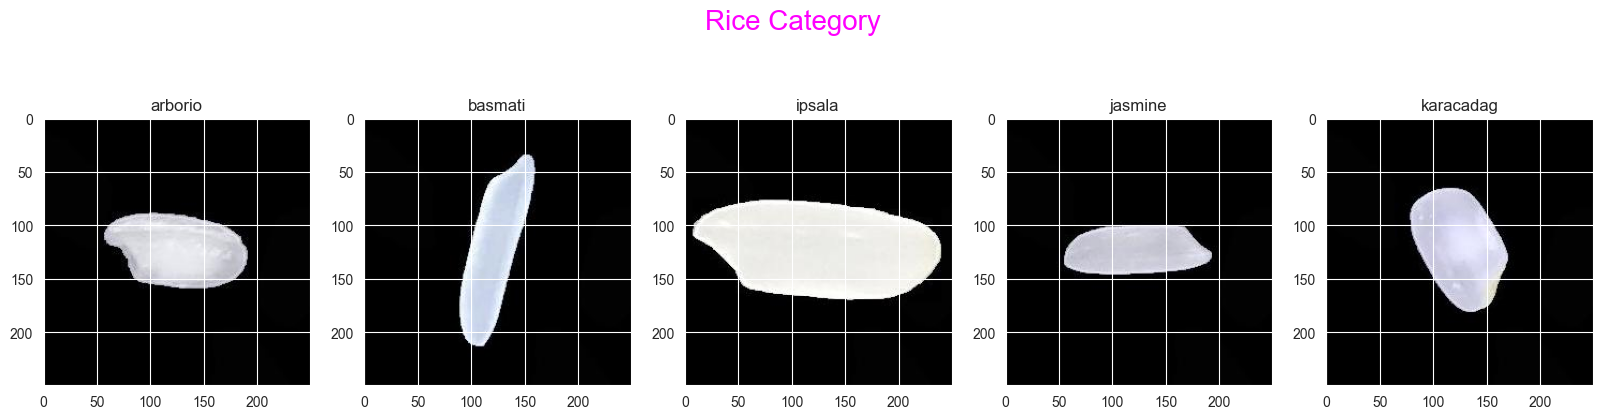

In [34]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category',color='magenta',fontsize=20)
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

In [35]:
path1=os.path.join(os.getcwd(),'Rice_Image_Dataset')
print(path1)

C:\Users\91834\Documents\4th year\aws\Rice_Image_Dataset


In [36]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory(path1,target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data=train_gen.flow_from_directory(path1,target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [102]:
print(test_data[0][0][0][112][112][2])

0.93725497


In [71]:
print(train_gen)

In [40]:
cnn2=keras.models.Sequential()
cnn2.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn2.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn2.add(keras.layers.Flatten())
cnn2.add(keras.layers.Dense(45,activation='relu'))
cnn2.add(keras.layers.Dense(15,activation='relu'))
cnn2.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn2.add(keras.layers.Dense(units=5,activation='sigmoid'))

In [41]:
cnn2.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [42]:
cnn.fit(train_data,epochs=2,validation_data=test_data,shuffle=True)

Epoch 1/2
1875/1875 [==============================] - 1233s 657ms/step - loss: 0.1246 - accuracy: 0.9574 - val_loss: 0.0574 - val_accuracy: 0.9811
Epoch 2/2
1875/1875 [==============================] - 704s 375ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0255 - val_accuracy: 0.9925


In [44]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

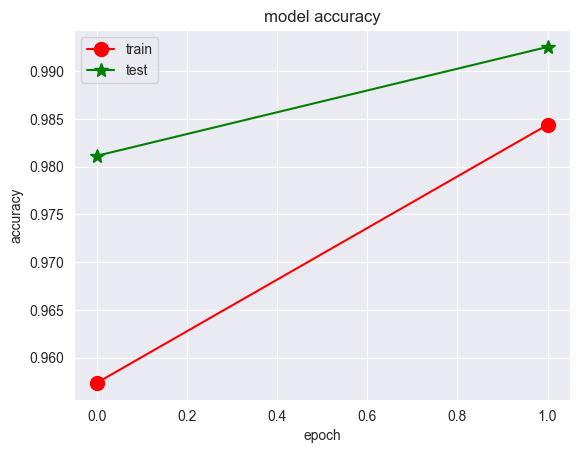

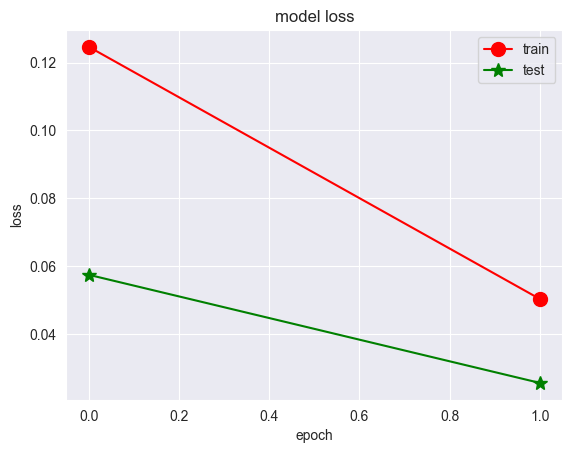

In [45]:
plot(cnn)

In [46]:
y_pred = cnn.predict(test_data)
main_y_pred = np.argmax(y_pred, axis=1)

15000/15000 [==============================] - 123s 8ms/step


In [47]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = cnn.predict_generator(test_data, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [48]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      3000
     Basmati       0.99      0.99      0.99      3000
      Ipsala       1.00      1.00      1.00      3000
     Jasmine       0.98      0.99      0.99      3000
   Karacadag       0.99      1.00      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



array([[2968,    0,    0,    5,   27],
       [   0, 2957,    0,   43,    0],
       [   1,    0, 2999,    0,    0],
       [   4,   18,    0, 2977,    1],
       [  12,    0,    0,    0, 2988]], dtype=int64)

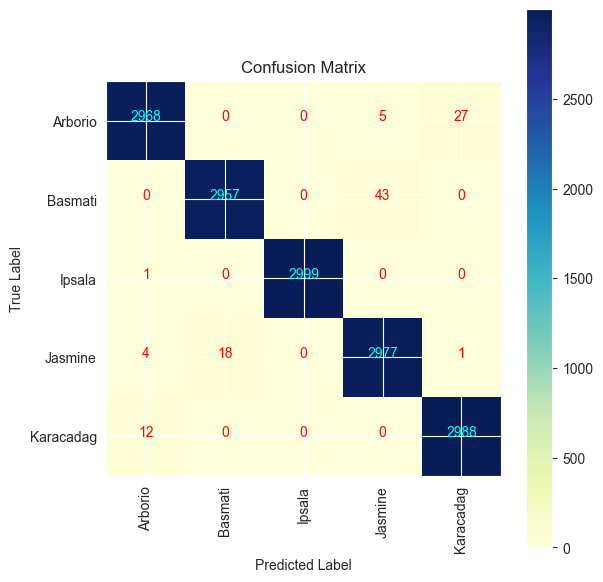

In [51]:
cm = confusion_matrix(test_data.classes, predicted_classes)
d1=test_data.class_indices
classes = list(d1.keys())
cmap= plt.cm.YlGnBu
plt.figure(figsize= (6, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
plt.title('Confusion Matrix')
plt.colorbar(shrink=True)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 90)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'aqua' if cm[i, j] > thresh else 'red')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
cm

In [52]:
train_score = cnn.evaluate(train_data, verbose= 1)
test_score = cnn.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

15000/15000 [==============================] - 134s 9ms/step - loss: 0.0255 - accuracy: 0.9925
Train Loss:  0.020260218530893326
Train Accuracy:  0.9930499792098999
*****************************
Test Loss:  0.025532780215144157
Test Accuracy:  0.9925333261489868


In [53]:
import pickle

In [59]:
pickle.dump(cnn,open(path1+r'\riceml.pkl','wb'))

INFO:tensorflow:Assets written to: ram://c7aa2c74-c416-4652-ab4e-d634f9d4083e/assets


INFO:tensorflow:Assets written to: ram://c7aa2c74-c416-4652-ab4e-d634f9d4083e/assets


In [70]:
print(path1+r'\newricegrain.jpeg')

C:\Users\91834\Documents\4th year\aws\Rice_Image_Dataset\newricegrain.jpeg


In [77]:
new_data=train_gen.flow_from_directory(path1+r'\newdata',target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 0 images belonging to 0 classes.
